# Campus Placement Status Prediction

# Business Problems and data understanding
## Objective:
The objective of this project is to build a classification model to predict whether a candidate will be placed or not based on various features provided in the dataset. The model will help in understanding the factors affecting placement status and assist in making informed decisions during the placement process.

## Constraints:

The model's predictions should be accurate and reliable to assist in making placement decisions effectively.
The model should be interpretable to understand the impact of different features on the placement status.
The model should handle missing values appropriately to avoid bias in predictions.
The model should avoid overfitting by selecting relevant features and using appropriate techniques for model evaluation.
The model should be scalable and adaptable to accommodate new data and changes in the placement process over time.
The model's performance should be evaluated using standard evaluation metrics such as accuracy, precision, recall, and F1-score to ensure its effectiveness.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [10]:
df = pd.read_csv("Placement_Data.csv")

In [11]:
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [34]:
df.tail(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


In [4]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
df.drop(['sl_no', ], axis=1, inplace=True)

In [5]:
df.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


In [5]:
df.shape

(215, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## EDA

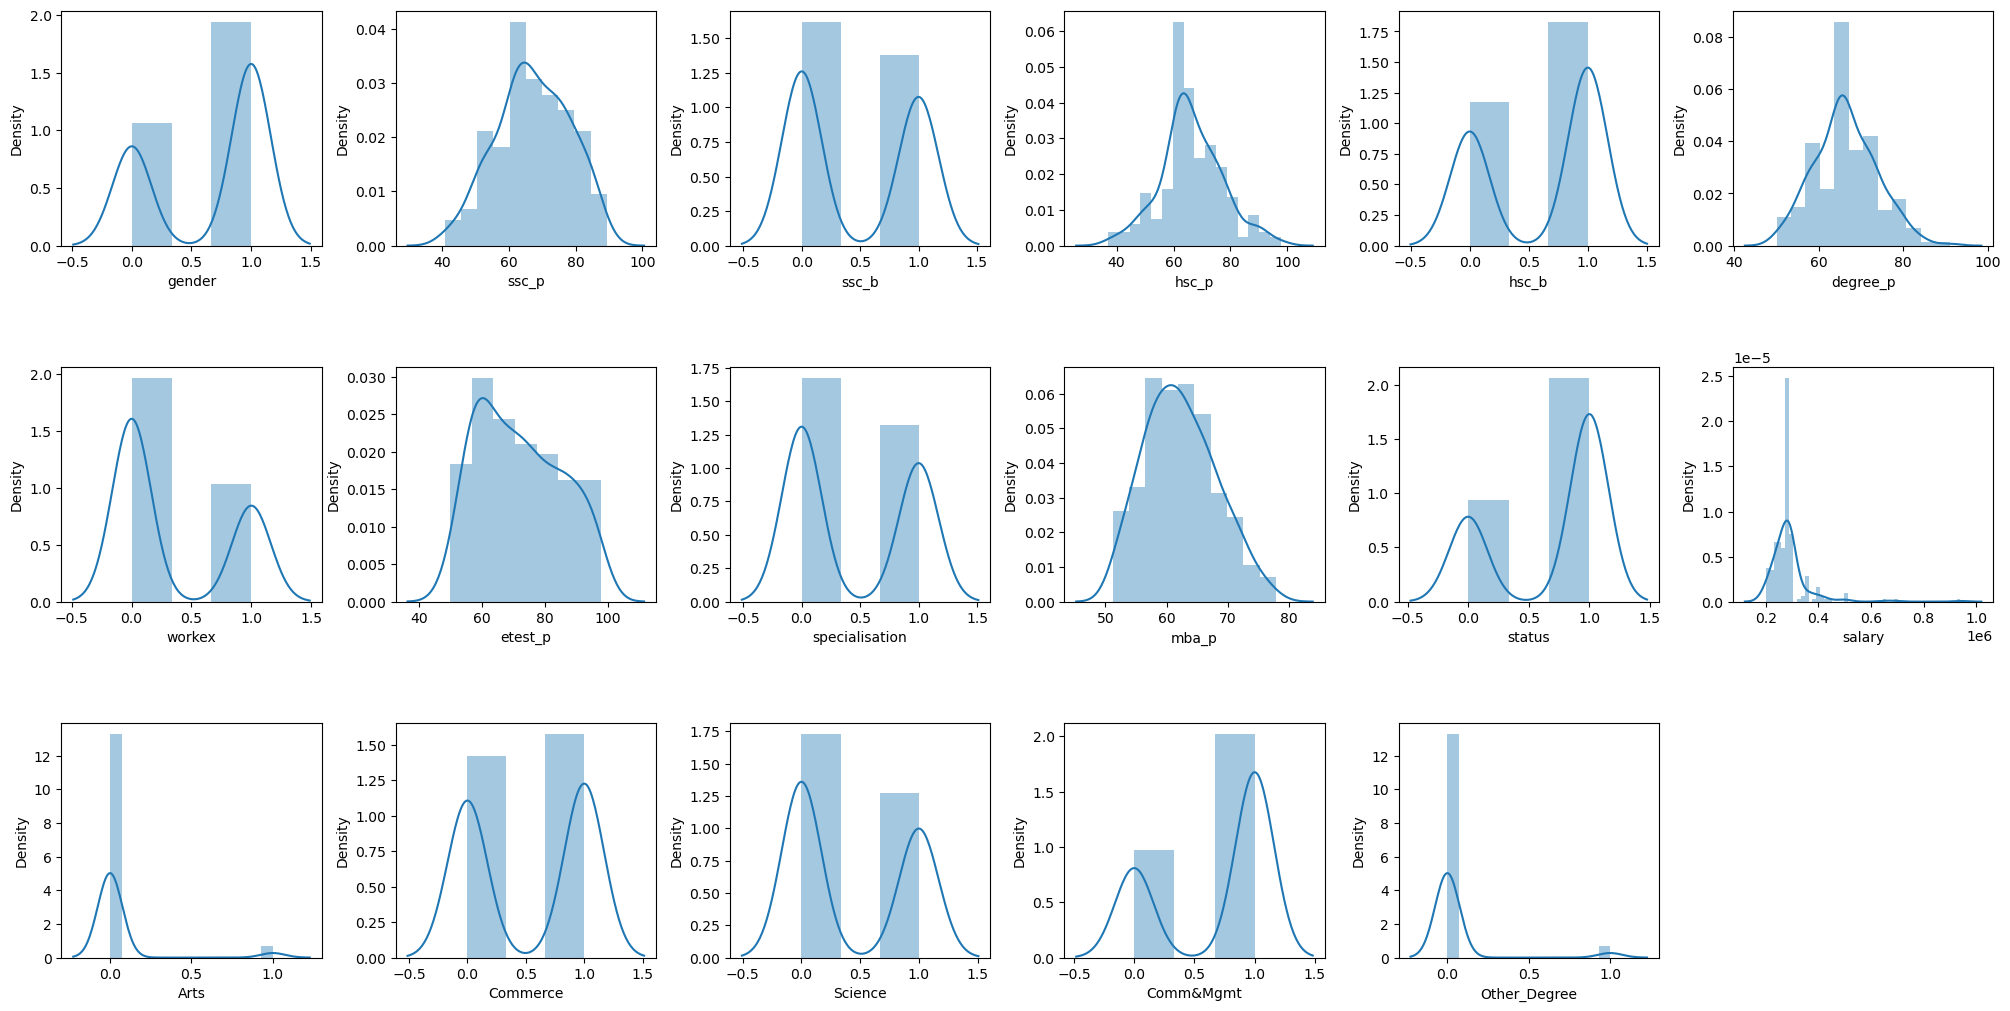

In [106]:
# checking distributions of all features
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1

# Since you have 18 plots, and you want to remove the last one,
# you need to access index 17, not index 18, which is out of bounds
fig.delaxes(axs[index - 1])  # Corrected index
plt.tight_layout(pad=0.3, w_pad=0.2, h_pad=4.5)
plt.show()

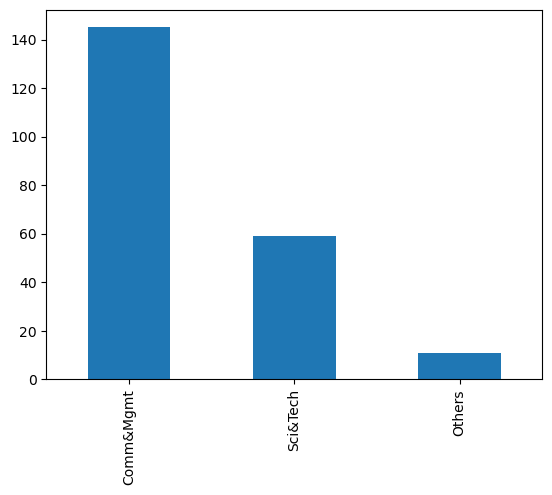

In [23]:
df["degree_t"].value_counts().plot.bar()
plt.show()

From the above plot we can see most students have degrees in Commerce and Management, followed by Science and Technology.

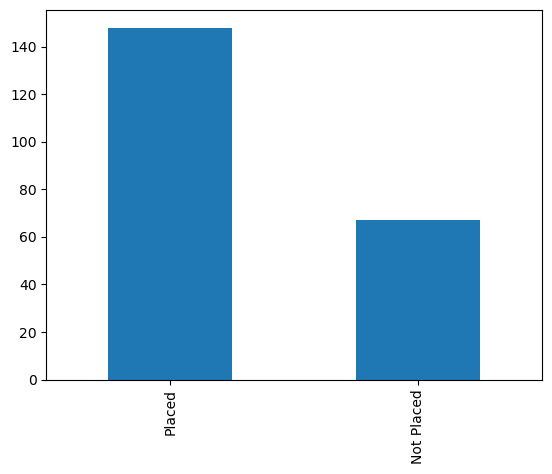

In [24]:
df["status"].value_counts().plot.bar()
plt.show()

Number of Placed students is above 140 and Not Placed is below 80

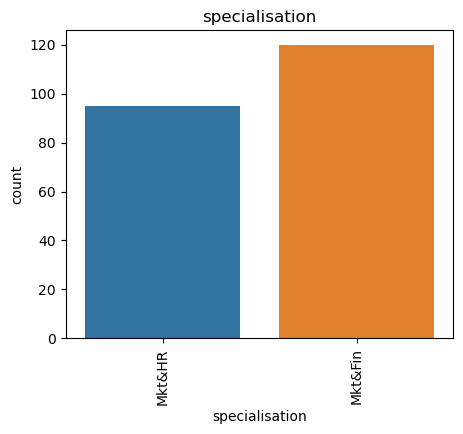

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='specialisation', data=df)
plt.title("specialisation")
plt.xticks(rotation=90)
#plt.text(5,6,"Hello")
plt.show()

Most of the students have done Specialisation in Marketing and Finance

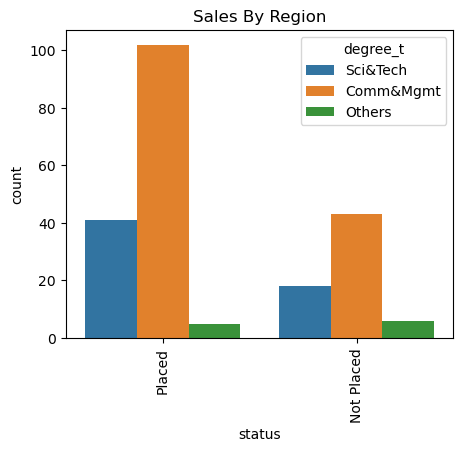

In [26]:
# Categorical vs Categorical bivariate
# hue => Categorical column. 
plt.figure(figsize=(5,4))
sns.countplot(x='status',hue='degree_t', data=df)
plt.title("Sales By Region")
plt.xticks(rotation=90)
plt.show()

Above plot illustrates the relationship between Status and Degree:
- From the plots above, we observe that the majority of students are placed and hold degrees in Commerce and Management.
- The count of placed students is higher than that of students who are not placed.

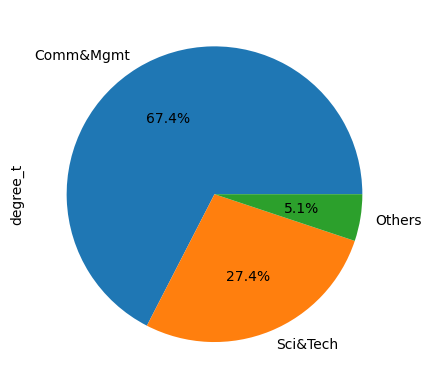

In [27]:
df["degree_t"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

Above pie chart shows that the percentage of Degree holder in different branches:
- Commerce and Management has 67.4%, Science&Technology 27.4% and Others 5.1%

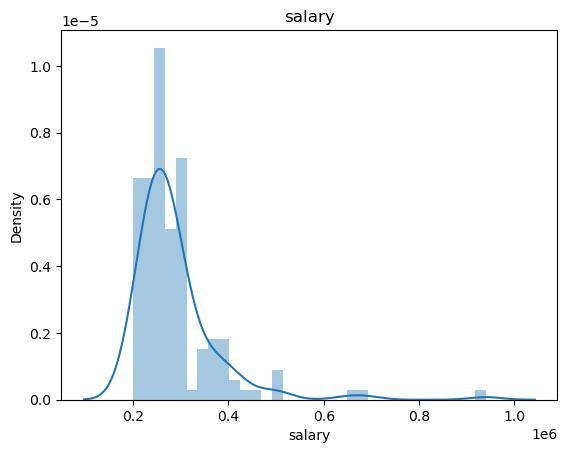

In [28]:
sns.distplot(df['salary'], kde=True)
plt.title("salary")
plt.show()

Most individuals fall within a specific salary range, with fewer outliers earning significantly more or less.

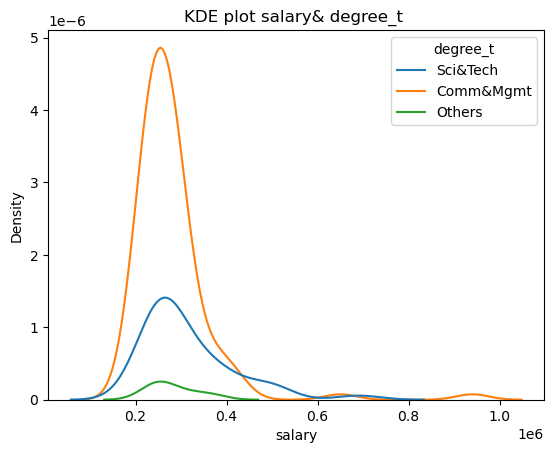

In [29]:
# hue converts univariate to Bivariate 
sns.kdeplot(x='salary', data=df, hue='degree_t')
plt.title("KDE plot salary& degree_t ")
plt.show()

Commerce & Management degree holders tend to have a higher salary peak compared to the other two categories.

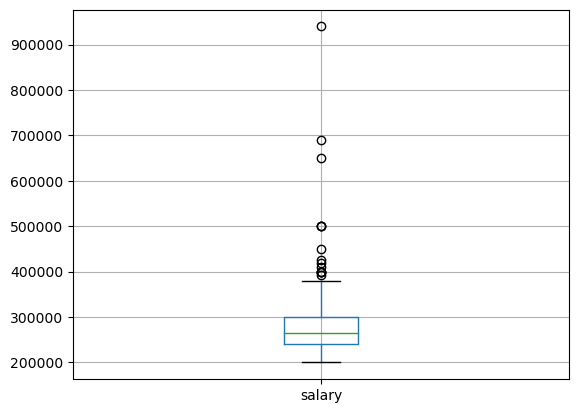

In [30]:
df.boxplot(column="salary")
plt.show()

- In this boxplot the green box represents the interquartile range (IQR), where the middle 50% of salaries fall.
  Inside the box, a line marks the median salary value.

- Above the whiskers, several circles represent outliers—individuals who earn significantly more than the majority.
- Most salaries cluster between approximately 200,000 and 300,000, with some outliers reaching up to 900,000.

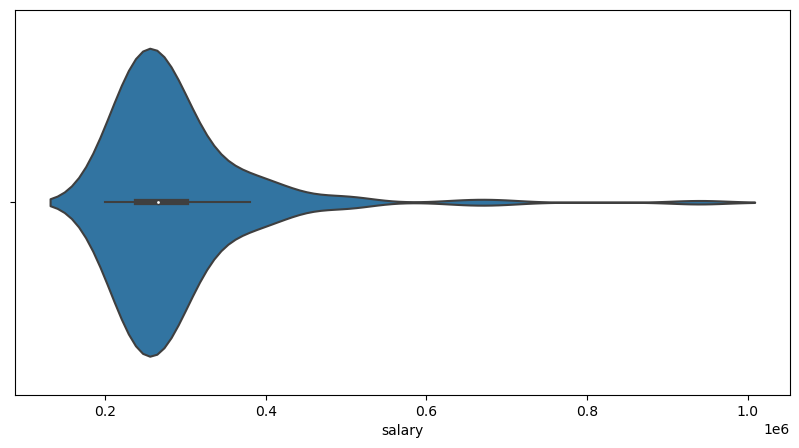

In [32]:
plt.figure(figsize=(10,5))
sns.violinplot(x='salary', data=df)
plt.show()

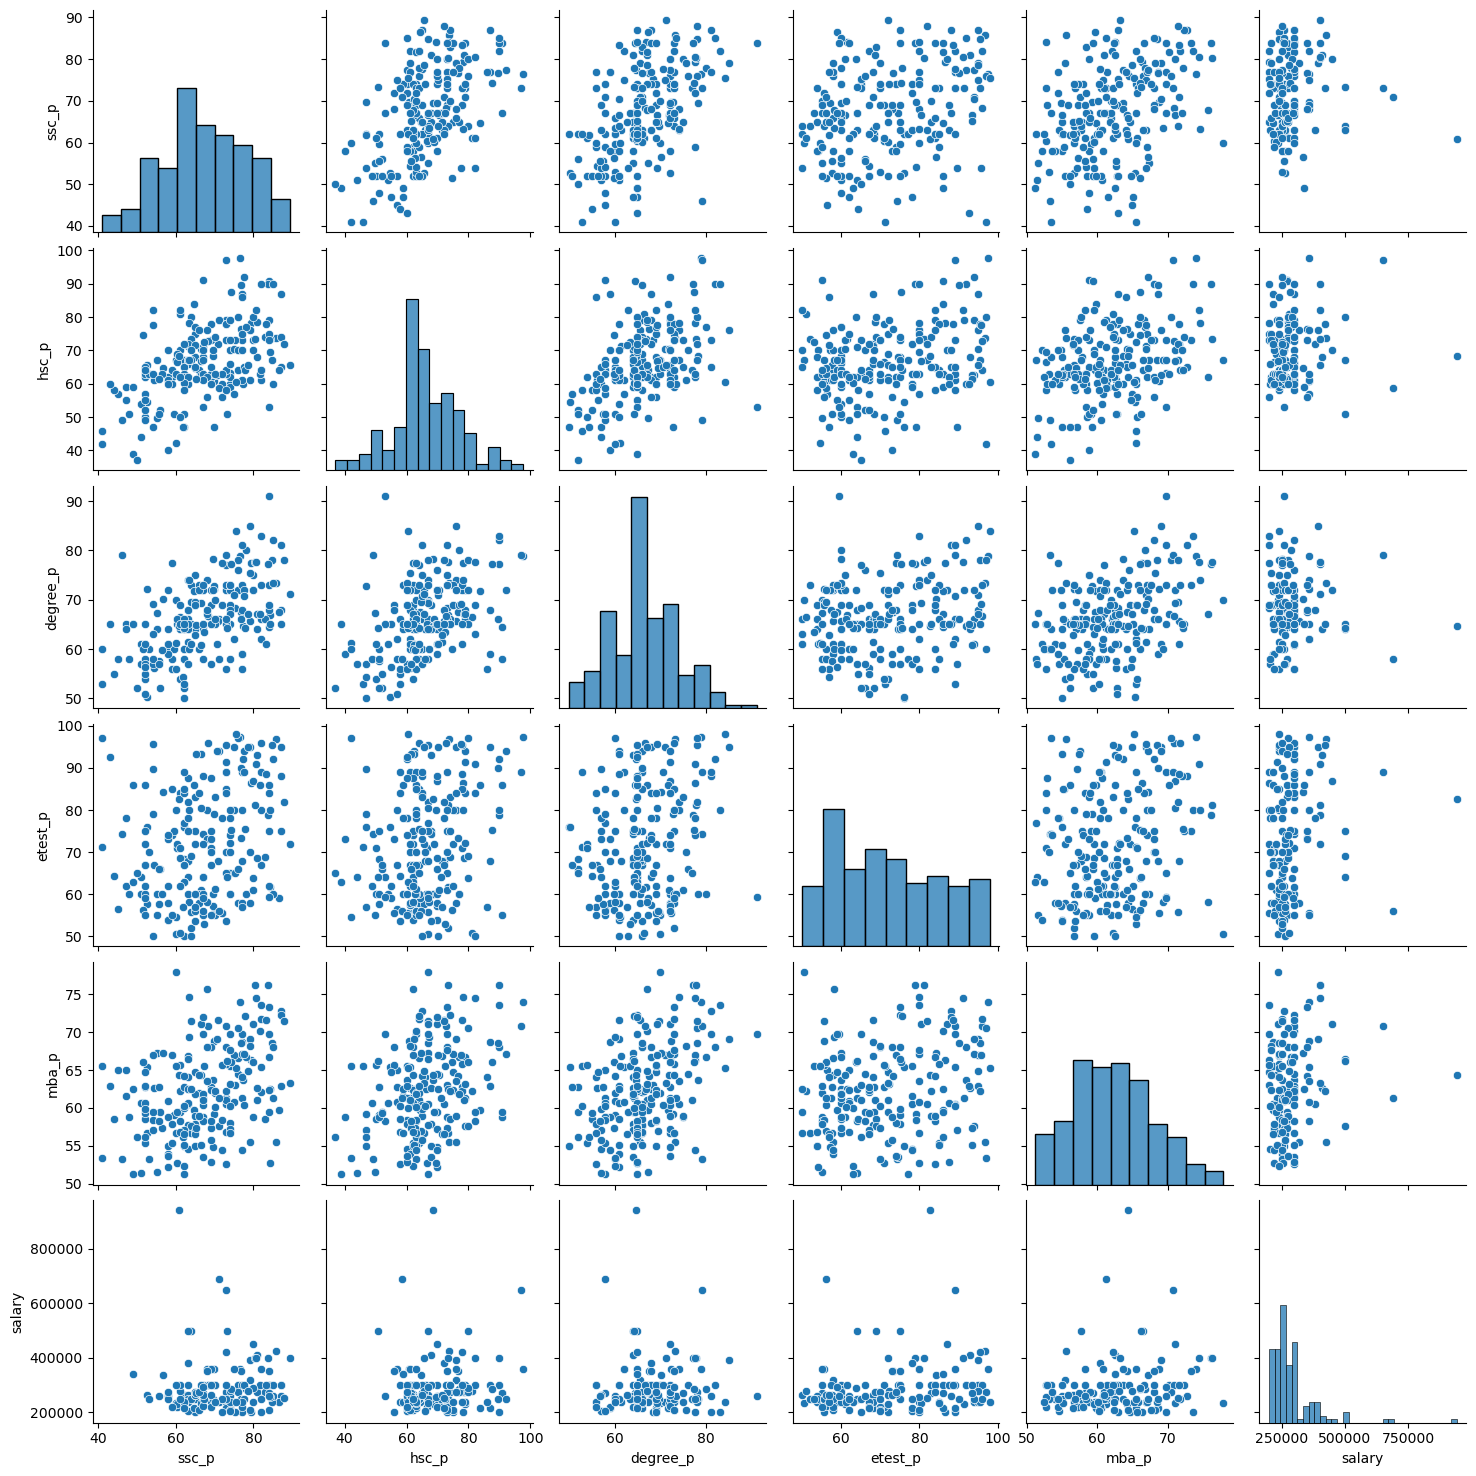

In [37]:
sns.pairplot(df)
plt.show()

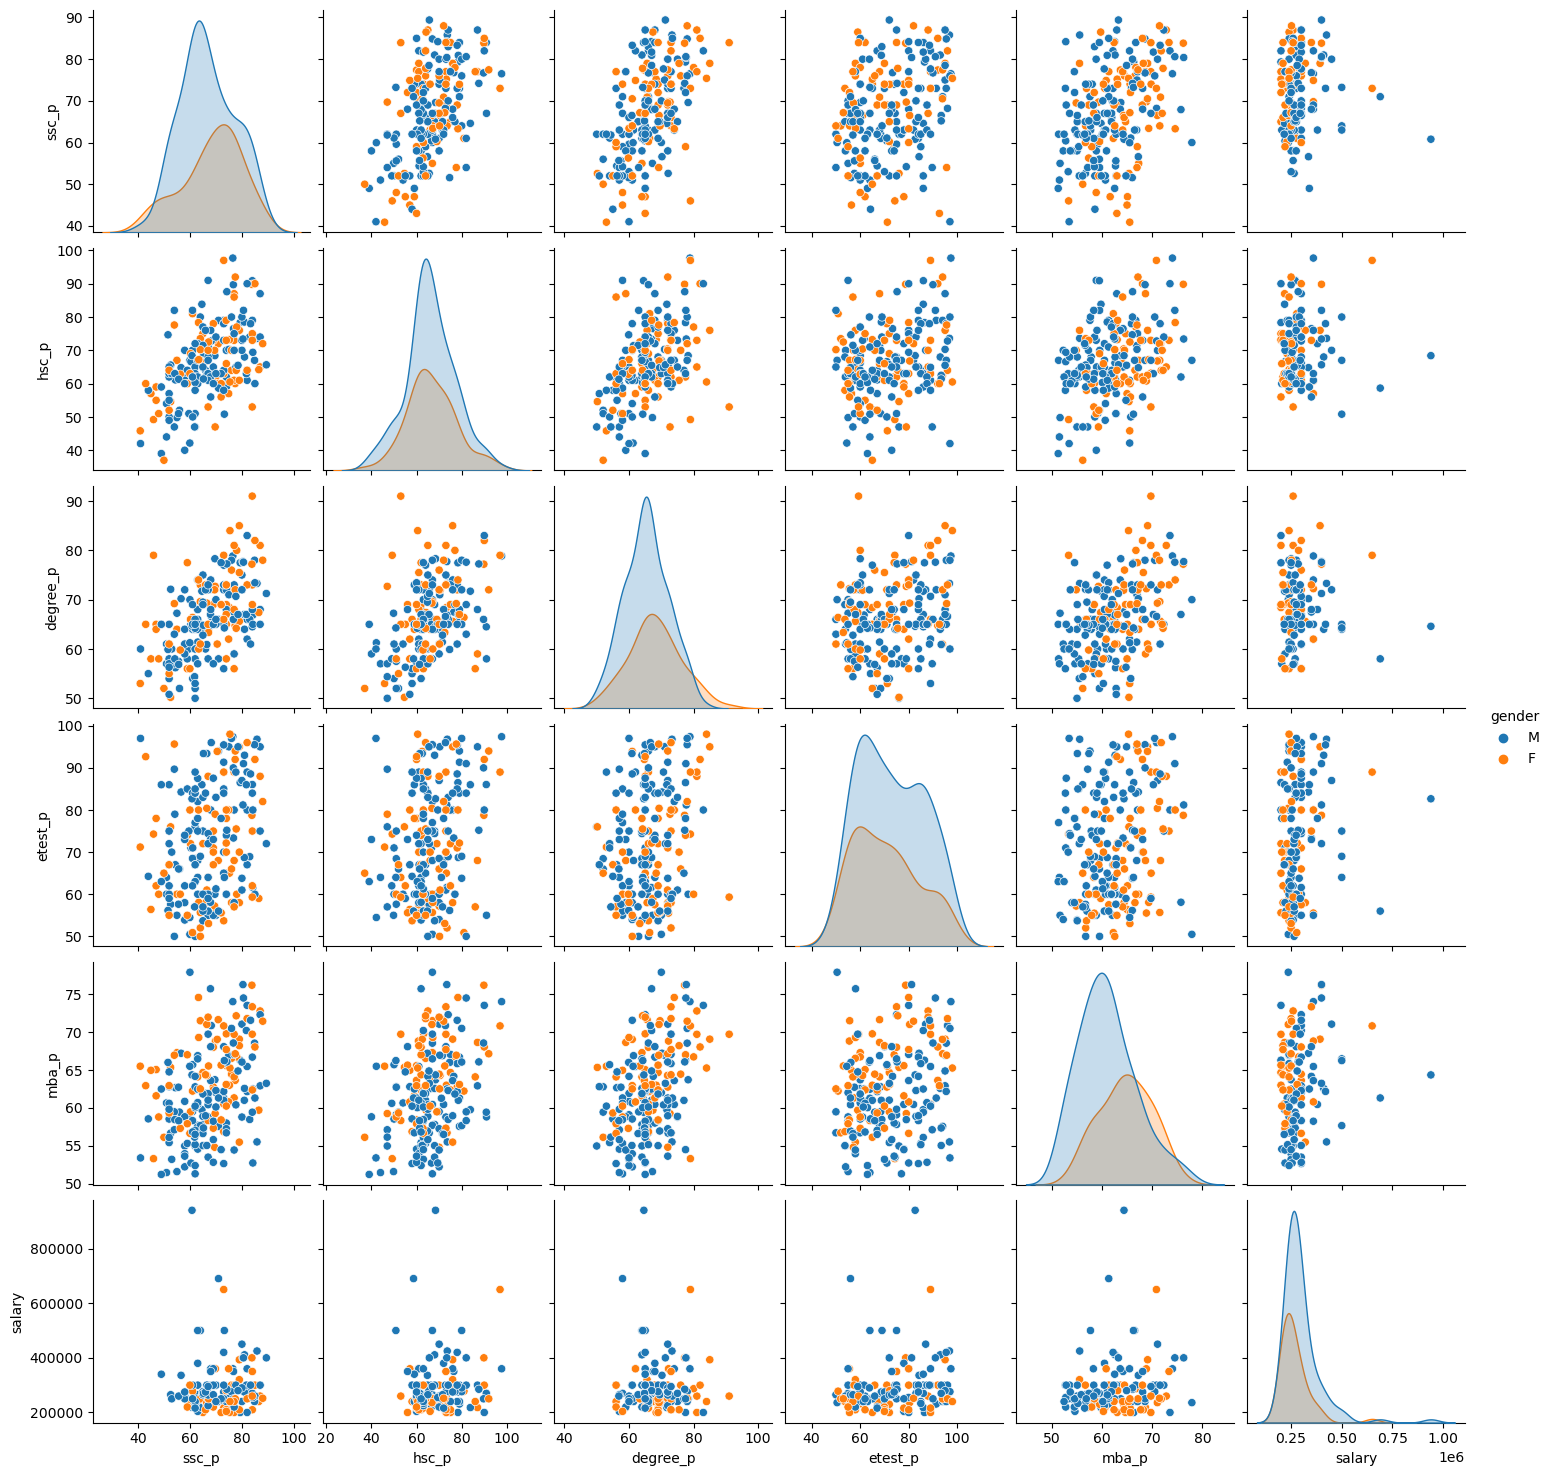

In [39]:
sns.pairplot(df, hue='gender')
plt.show()

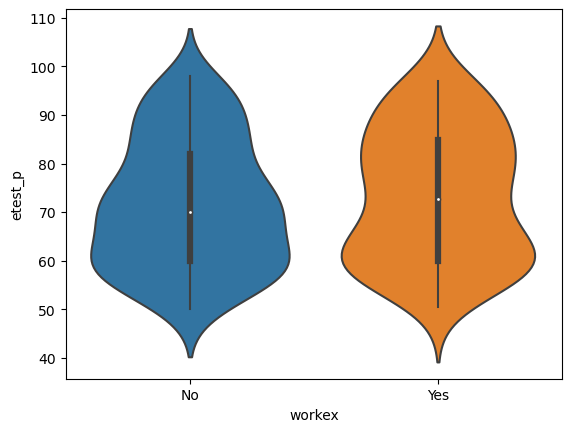

In [43]:
# Bivariate
sns.violinplot(x='workex',y='etest_p', data=df)
plt.show()

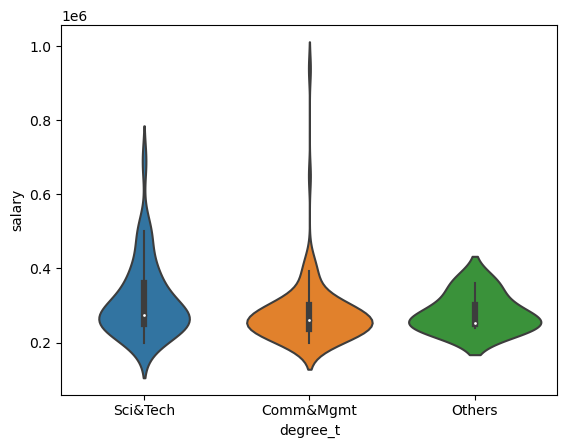

In [44]:
# Bivariate
sns.violinplot(x='degree_t',y='salary', data=df)
plt.show()

## Heatmap

In [86]:
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [55]:
np.triu(df.corr().values)

array([[ 1.        ,  0.5114721 ,  0.538404  ,  0.26199269,  0.38847755,
         0.03533034],
       [ 0.        ,  1.        ,  0.43420581,  0.24511293,  0.3548226 ,
         0.07681903],
       [ 0.        ,  0.        ,  1.        ,  0.22447017,  0.40236377,
        -0.01927223],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.21805467,
         0.17830731],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.17501294],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

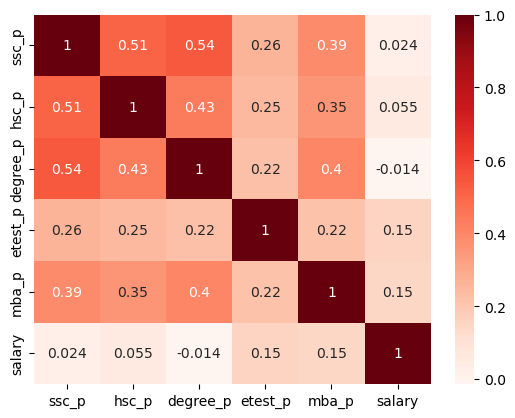

In [87]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.show()

This heatmap provides insights into how different educational and test performance variables correlate with salary
- The diagonal cells (from top left to bottom right) are dark red with a value of 1, indicating each variable’s perfect positive correlation with itself.
- Some pairs exhibit relatively high positive correlations:
  ssc_p - hsc_p
  ssc_p - degree_p
  hsc_p - degree_p
- Other correlations are weaker, such as mba_p - salary and etest_p - salary.

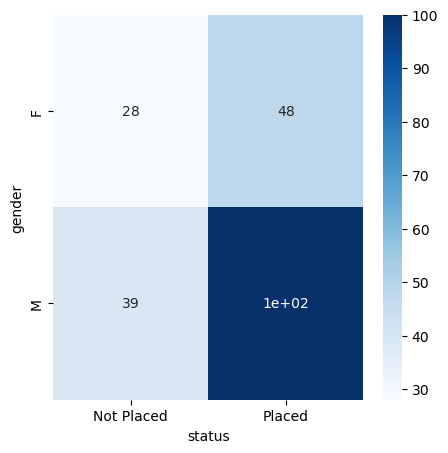

In [59]:
# Categorical vs categorical
plt.figure(figsize=(5,5))
sns.heatmap(pd.crosstab(df['gender'], df['status']), annot=True, cmap='Blues')
plt.show()

The heatmap visualizes the correlation between two categorical variables: gender (with categories F for female and M for male) and status (with categories Not Placed and Placed).
- Each cell in the heatmap contains a numerical value representing the correlation coefficient between the corresponding gender-status combination.

Notable observations:
- Females (F):
  Not Placed: 28 individuals
  Placed: 48 individuals
- Males (M):
  Not Placed: 39 individuals
  Placed: Over 100 individuals (1e+02)
- This heatmap highlights the relationship between gender and placement status, with more males being placed compared to females.

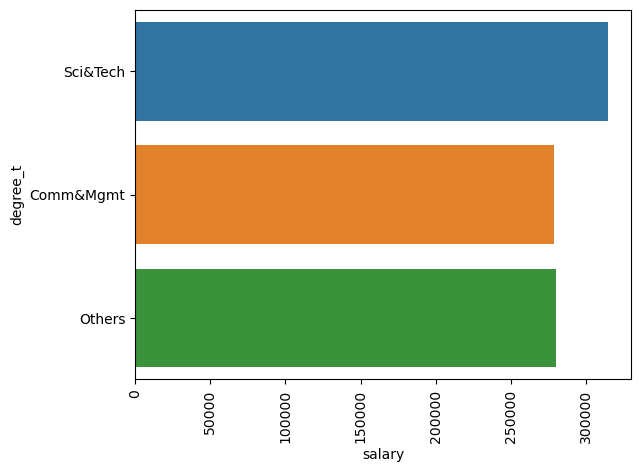

In [61]:
sns.barplot(x='salary', y='degree_t', data=df,ci=None,orient = "h")
plt.xticks(rotation = 90)
plt.show()

Above plot illustrates the average salaries based on different degree types:
- Sci&Tech: Individuals with a Sci&Tech degree have the highest average salary, exceeding 25,000.
- Sci&Tech graduates tend to earn more than those in Comm&Mgmt or other fields.

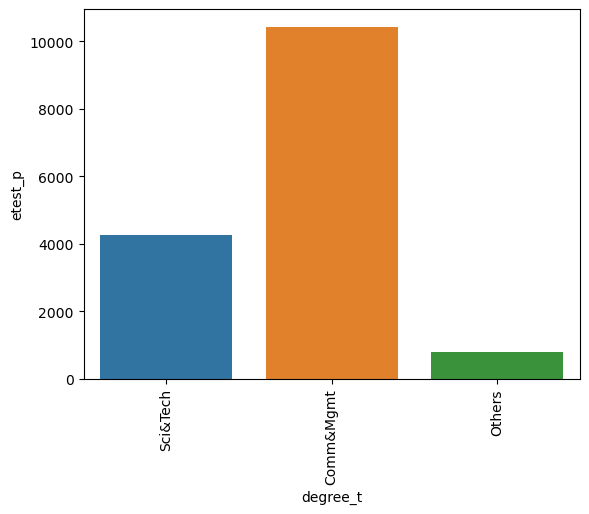

In [62]:
sns.barplot(x='degree_t', y='etest_p', data=df,ci=None,estimator=sum)
plt.xticks(rotation = 90)
plt.show()

## Checking outliers

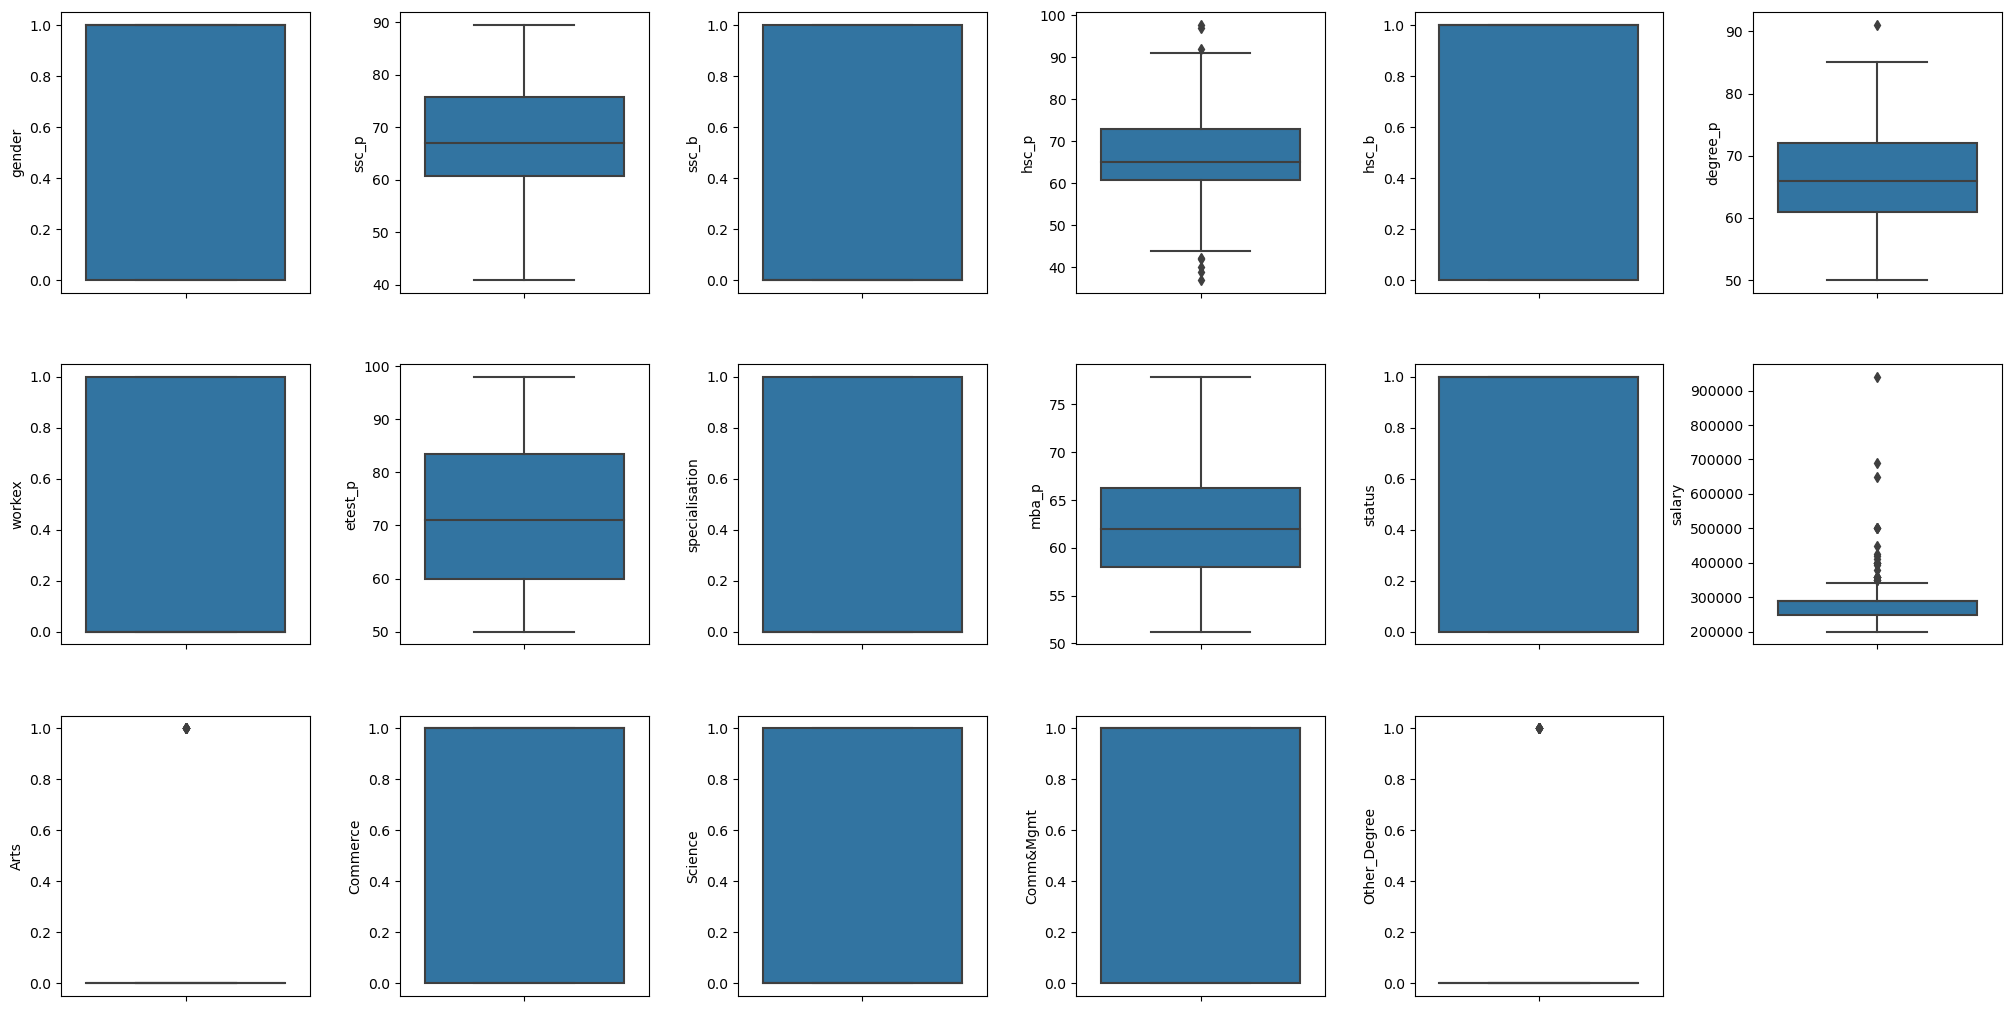

In [180]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=v, ax=axs[index])
    index += 1

# Since you have 18 plots, and you want to remove the last one,
# you need to access index 17, not index 18, which is out of bounds
fig.delaxes(axs[index - 1])  # Corrected index
plt.tight_layout(pad=0.3, w_pad=0.5, h_pad=4.5)
plt.show()

In [82]:
df[(df['degree_t']=="Sci&Tech") & (df['status']=="Placed")].sort_values(by="salary",ascending=False).head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
150,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
77,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
53,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0


## Data Preprocessing

In [63]:
#Finding missing values
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [88]:
#cheking Duplicates
df.duplicated().sum()

0

In [91]:
# checking column values data type
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [14]:
# as salary and sl_no columns are not required for placement status prediction so we drop it
df.drop(['salary'], axis=1, inplace=True)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


## Label Encoding Data

In [17]:
# label encoding needs to be done to ensure all values in the dataset is numeric
# hsc_s, degree_t columns needs to be splitted into columns (get_dummies needs to be applied)
features_to_split = ['hsc_s','degree_t']
for feature in features_to_split:
    dummy = pd.get_dummies(df[feature])
    df = pd.concat([df, dummy], axis=1)
    df.drop(feature, axis=1, inplace=True)

In [18]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Others,Sci&Tech
0,1,M,67.00,Others,91.00,Others,58.00,No,55.0,Mkt&HR,58.80,Placed,0,1,0,0,0,1
1,2,M,79.33,Central,78.33,Others,77.48,Yes,86.5,Mkt&Fin,66.28,Placed,0,0,1,0,0,1


In [19]:
df.rename(columns={"Others": "Other_Degree"},inplace=True)

In [20]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 

In [21]:
columns_to_encode = ['gender','ssc_b', 'hsc_b','workex','specialisation','status']
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [22]:
df.head(2)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1


In [23]:
df.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,Arts,Commerce,Science,Comm&Mgmt,Other_Degree,Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.646512,67.303395,0.460465,66.333163,0.609302,66.370186,0.344186,72.100558,0.441860,62.278186,0.688372,0.051163,0.525581,0.423256,0.674419,0.051163,0.274419
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.220844,0.500510,0.495228,0.469685,0.220844,0.447262
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,108.000000,1.000000,67.000000,0.000000,65.000000,1.000000,66.000000,0.000000,71.000000,0.000000,62.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the data

In [24]:
X = df.drop('status', axis=1)
y =df['status']

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=23)

In [26]:
sc= StandardScaler()
x_scaled = sc.fit_transform(X) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)

In [28]:
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [74]:
from mixed_naive_bayes import MixedNB

mnb = MixedNB()
mnb.fit(X_train, y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = mnb.predict(X_test)


In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 70.37%
Precision: 75.00%
Recall: 83.33%
F1-score: 78.95%


Conclusion, the classification model developed for predicting placement status based on the provided dataset 
- demonstrates promising performance with an accuracy of 70.37%. 
- The precision of 75.00% indicates the proportion of correctly predicted positive placements out of all placements predicted by the model. 
- Additionally, the model exhibits a recall of 83.33%, suggesting its ability to correctly identify the majority of actual positive placements. 
- The F1-score, a harmonic mean of precision and recall, stands at 78.95%, indicating a balanced performance between precision and recall.

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score,ConfusionMatrixDisplay

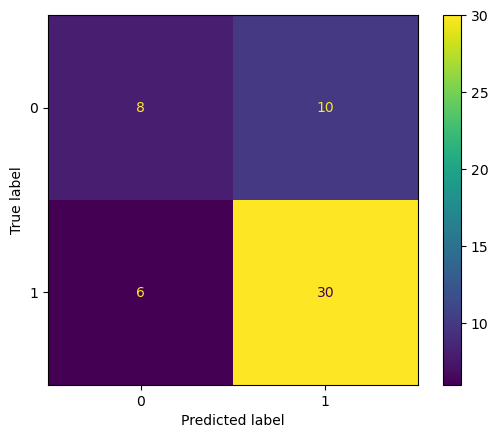

In [33]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50        18
           1       0.75      0.83      0.79        36

    accuracy                           0.70        54
   macro avg       0.66      0.64      0.64        54
weighted avg       0.69      0.70      0.69        54



## Import The models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mixed_naive_bayes import MixedNB
from sklearn.ensemble import GradientBoostingClassifier

##  Model Training

In [36]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

svm = svm.SVC()
svm.fit(X_train,y_train)

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

mnb = MixedNB()
mnb.fit(X_train, y_train)

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

## Prediction on Test Data

In [37]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = knn.predict(X_test)
y_pred4 = dt.predict(X_test)
y_pred5 = rf.predict(X_test)
y_pred6 = mnb.predict(X_test)
y_pred7 =gb.predict(X_test)

##  Evaluating the Algorithms

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)
score7=accuracy_score(y_test,y_pred7)

In [40]:
print(score1,score2,score3,score4,score5,score6,score7)

0.8518518518518519 0.7037037037037037 0.6851851851851852 0.7037037037037037 0.8148148148148148 0.7037037037037037 0.8148148148148148


In [41]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','MNB','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100,score7*100]})

In [42]:
final_data

,Models,ACC
0,LR,85.185185
1,SVC,70.370370
2,KNN,68.518519
3,DT,70.370370
4,RF,81.481481
5,MNB,70.370370
6,GB,81.481481


In [54]:
from sklearn.metrics import precision_score

In [55]:
score1=precision_score(y_test,y_pred1)
score2=precision_score(y_test,y_pred2)
score3=precision_score(y_test,y_pred3)
score4=precision_score(y_test,y_pred4)
score5=precision_score(y_test,y_pred5)
score6=precision_score(y_test,y_pred6)
score7=precision_score(y_test,y_pred7)

In [56]:
print(score1,score2,score3,score4,score5,score6,score7)

0.868421052631579 0.6923076923076923 0.7209302325581395 0.75 0.7954545454545454 0.75 0.7954545454545454


In [57]:
final_data_precision_score = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','MNB','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100,score7*100]})

In [58]:
final_data_precision_score

,Models,ACC
0,LR,86.842105
1,SVC,69.230769
2,KNN,72.093023
3,DT,75.000000
4,RF,79.545455
5,MNB,75.000000
6,GB,79.545455


In [64]:
from sklearn.metrics import recall_score

In [65]:
score1=recall_score(y_test,y_pred1)
score2=recall_score(y_test,y_pred2)
score3=recall_score(y_test,y_pred3)
score4=recall_score(y_test,y_pred4)
score5=recall_score(y_test,y_pred5)
score6=recall_score(y_test,y_pred6)
score7=recall_score(y_test,y_pred7)

In [66]:
print(score1,score2,score3,score4,score5,score6,score7)

0.9166666666666666 1.0 0.8611111111111112 0.8333333333333334 0.9722222222222222 0.8333333333333334 0.9722222222222222


In [67]:
final_data_recall_score = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','MNB','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100,score7*100]})

In [68]:
final_data_recall_score

,Models,ACC
0,LR,91.666667
1,SVC,100.000000
2,KNN,86.111111
3,DT,83.333333
4,RF,97.222222
5,MNB,83.333333
6,GB,97.222222


In [69]:
from sklearn.metrics import f1_score

In [70]:
score1=f1_score(y_test,y_pred1)
score2=f1_score(y_test,y_pred2)
score3=f1_score(y_test,y_pred3)
score4=f1_score(y_test,y_pred4)
score5=f1_score(y_test,y_pred5)
score6=f1_score(y_test,y_pred6)
score7=f1_score(y_test,y_pred7)

In [71]:
print(score1,score2,score3,score4,score5,score6,score7)

0.8918918918918919 0.8181818181818182 0.7848101265822784 0.7894736842105263 0.875 0.7894736842105263 0.875


In [72]:
final_data_f1_score = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','MNB','GB'],
            'ACC':[score1*100,
                  score2*100,
                  score3*100,
                  score4*100,
                  score5*100,score6*100,score7*100]})

In [73]:
final_data_f1_score

,Models,ACC
0,LR,89.189189
1,SVC,81.818182
2,KNN,78.481013
3,DT,78.947368
4,RF,87.500000
5,MNB,78.947368
6,GB,87.500000
